In [1]:
import sys
import numpy as np
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, LassoCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Use Casm to generate files containing the correlation functions as well as the formation energies.
Generate correlation functions with: 

`casm query -k corr -o correlations.txt`

Generate formation energies with:

`casm query -k formation_energy -o formation_energies.txt`


In [2]:
correlation_matrix_file = 'correlations.txt' 
formation_energies_file = 'formation_energies.txt' 

Read from the data files, and remove SCEL indices and selection status columns

In [3]:
x_raw = np.genfromtxt(correlation_matrix_file, skip_header=1) #rows are SCELs columns are each correlation function
y_raw = np.genfromtxt(formation_energies_file, skip_header=1) #a row of energies
X = x_raw[:, 2:-1]     #The correlation matrix: each row corresponds to one SCEL
y = y_raw[:, 2]        #An array of energies corresponding to each SCEL

column_select = list(range(0,10)) + list(range(23,33)) + list(range(140,150))
x_downsample = X#[:,column_select]
print(x_downsample.shape)


(627, 252)


Perform a k-fold cross validation, and display the score. This approach does not shuffle SCEL's, but that will be implemented in the future.

This uses R squared scoring, though other scoring metrics for regression are possible.
The full list: https://scikit-learn.org/stable/modules/model_evaluation.html


In [4]:
kfold=10
#scores = cross_val_score(LassoCV(), x_downsample, y, scoring='r2', cv=kfold)
#include rms
#can pass cross val. generator to cv

Now perform the fit using Least squares on the entire dataset and display the R squared score as well as the ECI

The Cross Validation Score for 10-fold fitting across 627 SCELs is



---------------------------------------------------------------


(627, 252)
209


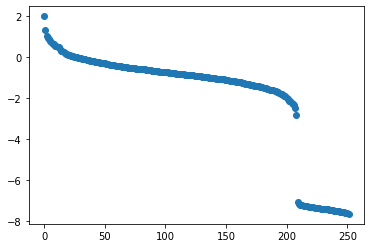

/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003097313903052401, tolerance: 0.00013576701403860466
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008313143869490558, tolerance: 0.00013576701403860466
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007669136368788632, tolerance: 0.00013576701403860466
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coor

ECIs:
[-0.0353075  -0.20392262  0.23353997  0.14422278 -0.09377831  0.04002268
 -0.01508833  0.02378128 -0.         -0.         -0.         -0.
  0.         -0.02544179 -0.01356199 -0.         -0.         -0.02971349
  0.         -0.01304775 -0.          0.         -0.          0.14364963
 -0.          0.         -0.         -0.         -0.         -0.
  0.13620227  0.06476871  0.         -0.          0.00035636  0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.          0.02502949  0.          0.01144645  0.
 -0.          0.          0.          0.          0.          0.
  0.         -0.02379214  0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.        

/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000704933295826167, tolerance: 0.00013725548353401464
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014305092744701375, tolerance: 0.00014159514811929184
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005084041013930229, tolerance: 0.00014159514811929184
  tol, rng, random, positive)
/Users/derickober/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coor

In [5]:
print("The Cross Validation Score for %d-fold fitting across %d SCELs is\n" % (kfold, len(X)))
#print(scores)
print('\n\n---------------------------------------------------------------\n\n')

print(x_downsample.shape)
print(np.linalg.matrix_rank(x_downsample, tol=1e-4))
(u, s, vh) = np.linalg.svd(x_downsample)
plt.scatter(range(len(s)), np.log10(s))
plt.show()

reg = LassoCV(fit_intercept=False).fit(x_downsample,y)
print("ECIs:")          #plot next to axis of indices
print(reg.coef_) #these ECIs 
print("Intercept")
print(reg.intercept_)
print('Full fit score:')
print(reg.score(x_downsample,y))
print("Difference")
print(y - reg.predict(x_downsample))